In [1]:
import warnings
warnings.filterwarnings('ignore')

# **Jamboree Education - Linear Regression**

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.

They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.



### **Column Profiling:**

* Serial No. (Unique row ID)
* GRE Scores (out of 340)
* TOEFL Scores (out of 120)
* University Rating (out of 5)
* Statement of Purpose and Letter of Recommendation Strength (out of 5)
* Undergraduate GPA (out of 10)
* Research Experience (either 0 or 1)
* Chance of Admit (ranging from 0 to 1)

## **Problem Statment:**

Help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

***Import Libraries:***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set(style = 'darkgrid')
plt.rcParams["figure.figsize"] = (8,6)

In [3]:
data = pd.read_csv('Jamboree_Admission.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df = data.drop(columns = 'Serial No.')

Fist column i.e. 'Serial No.' which was observed as unique row identifier which was dropped and was not required for model building.

***Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.***

In [5]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73
499,327,113,4,4.5,4.5,9.04,0,0.84


Conclusion:

- University Rating , SOP and LOR strength and research are seems to be discrete random Variables , but also ordinal numeric data.

In [7]:
print(f'Total number Elements in Dataset: {df.size}')

Total number Elements in Dataset: 4000


In [8]:
print('SHAPE:',df.shape)
print(f'Number of OBSERVATIONS : {df.shape[0]}')
print(f'Number of FEATURES : {df.shape[1]}')

SHAPE: (500, 8)
Number of OBSERVATIONS : 500
Number of FEATURES : 8


In [9]:
print('Summary of the Dataset:-')
df.info();

Summary of the Dataset:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [10]:
print('Total Number of Missing value in Dataset:', df.isna().sum().sum())
print('Total Nummber of Missing value in Each Features:')
df.isna().sum()

Total Number of Missing value in Dataset: 0
Total Nummber of Missing value in Each Features:


GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Conclusion:
- No null values are present in dataset

In [11]:
print('Descriptive statistics of a DataFrame:-')
df.describe().T

Descriptive statistics of a DataFrame:-


,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [12]:
# Column Names:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

### **Removing some extra spaces and spelling correction of the features header**

In [13]:
column_names = {
    'GRE Score': 'GRE_Score',
    'TOEFL Score': 'TOEFL_Score',
    'University Rating':'University_Rating',
    'SOP':'SOP','LOR ':'LOR',
    'Chance of Admit ': 'Chance_of_Admit'
}
df.rename(columns = column_names, inplace = True)

In [14]:
# New updated columns:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [15]:
#  Number oof unique values in each features:
df.nunique()

GRE_Score             49
TOEFL_Score           29
University_Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance_of_Admit       61
dtype: int64

* From the above we can observe that;
  
* University_Rating, SOP, LOR, and Research are categorical variables as the number of unique values are very small in number.

* Rest of the other features are numeric , and ordinal .
* Except for (University Rating,SOP,LOR,Research are discrete) and rest are continuous
* 
Also if SOP , University rating , LOR and research can be considered as numeric ordinal data.

## **Checking the overall linearity and correlation across all features using pairplot :** 

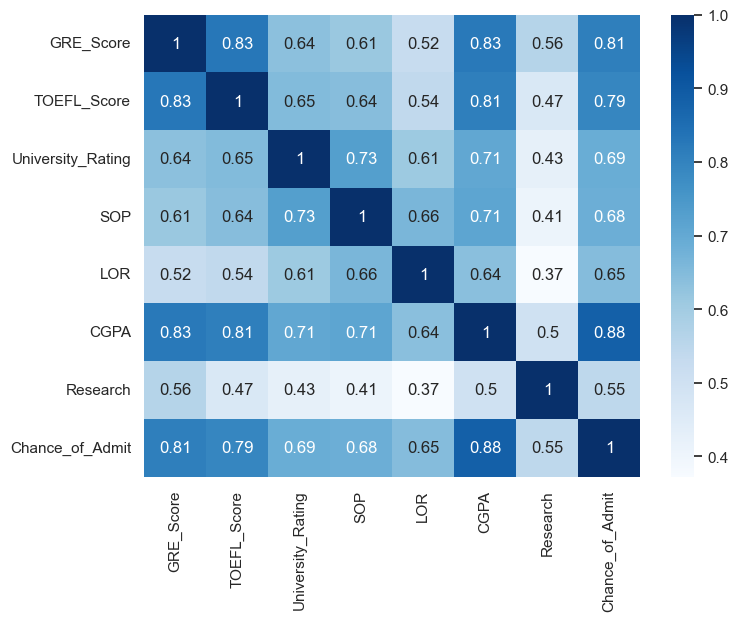

In [16]:
# Using heatmap to show the corlinearity in the data;
sns.heatmap(df.corr(),annot= True,cmap = "Blues");

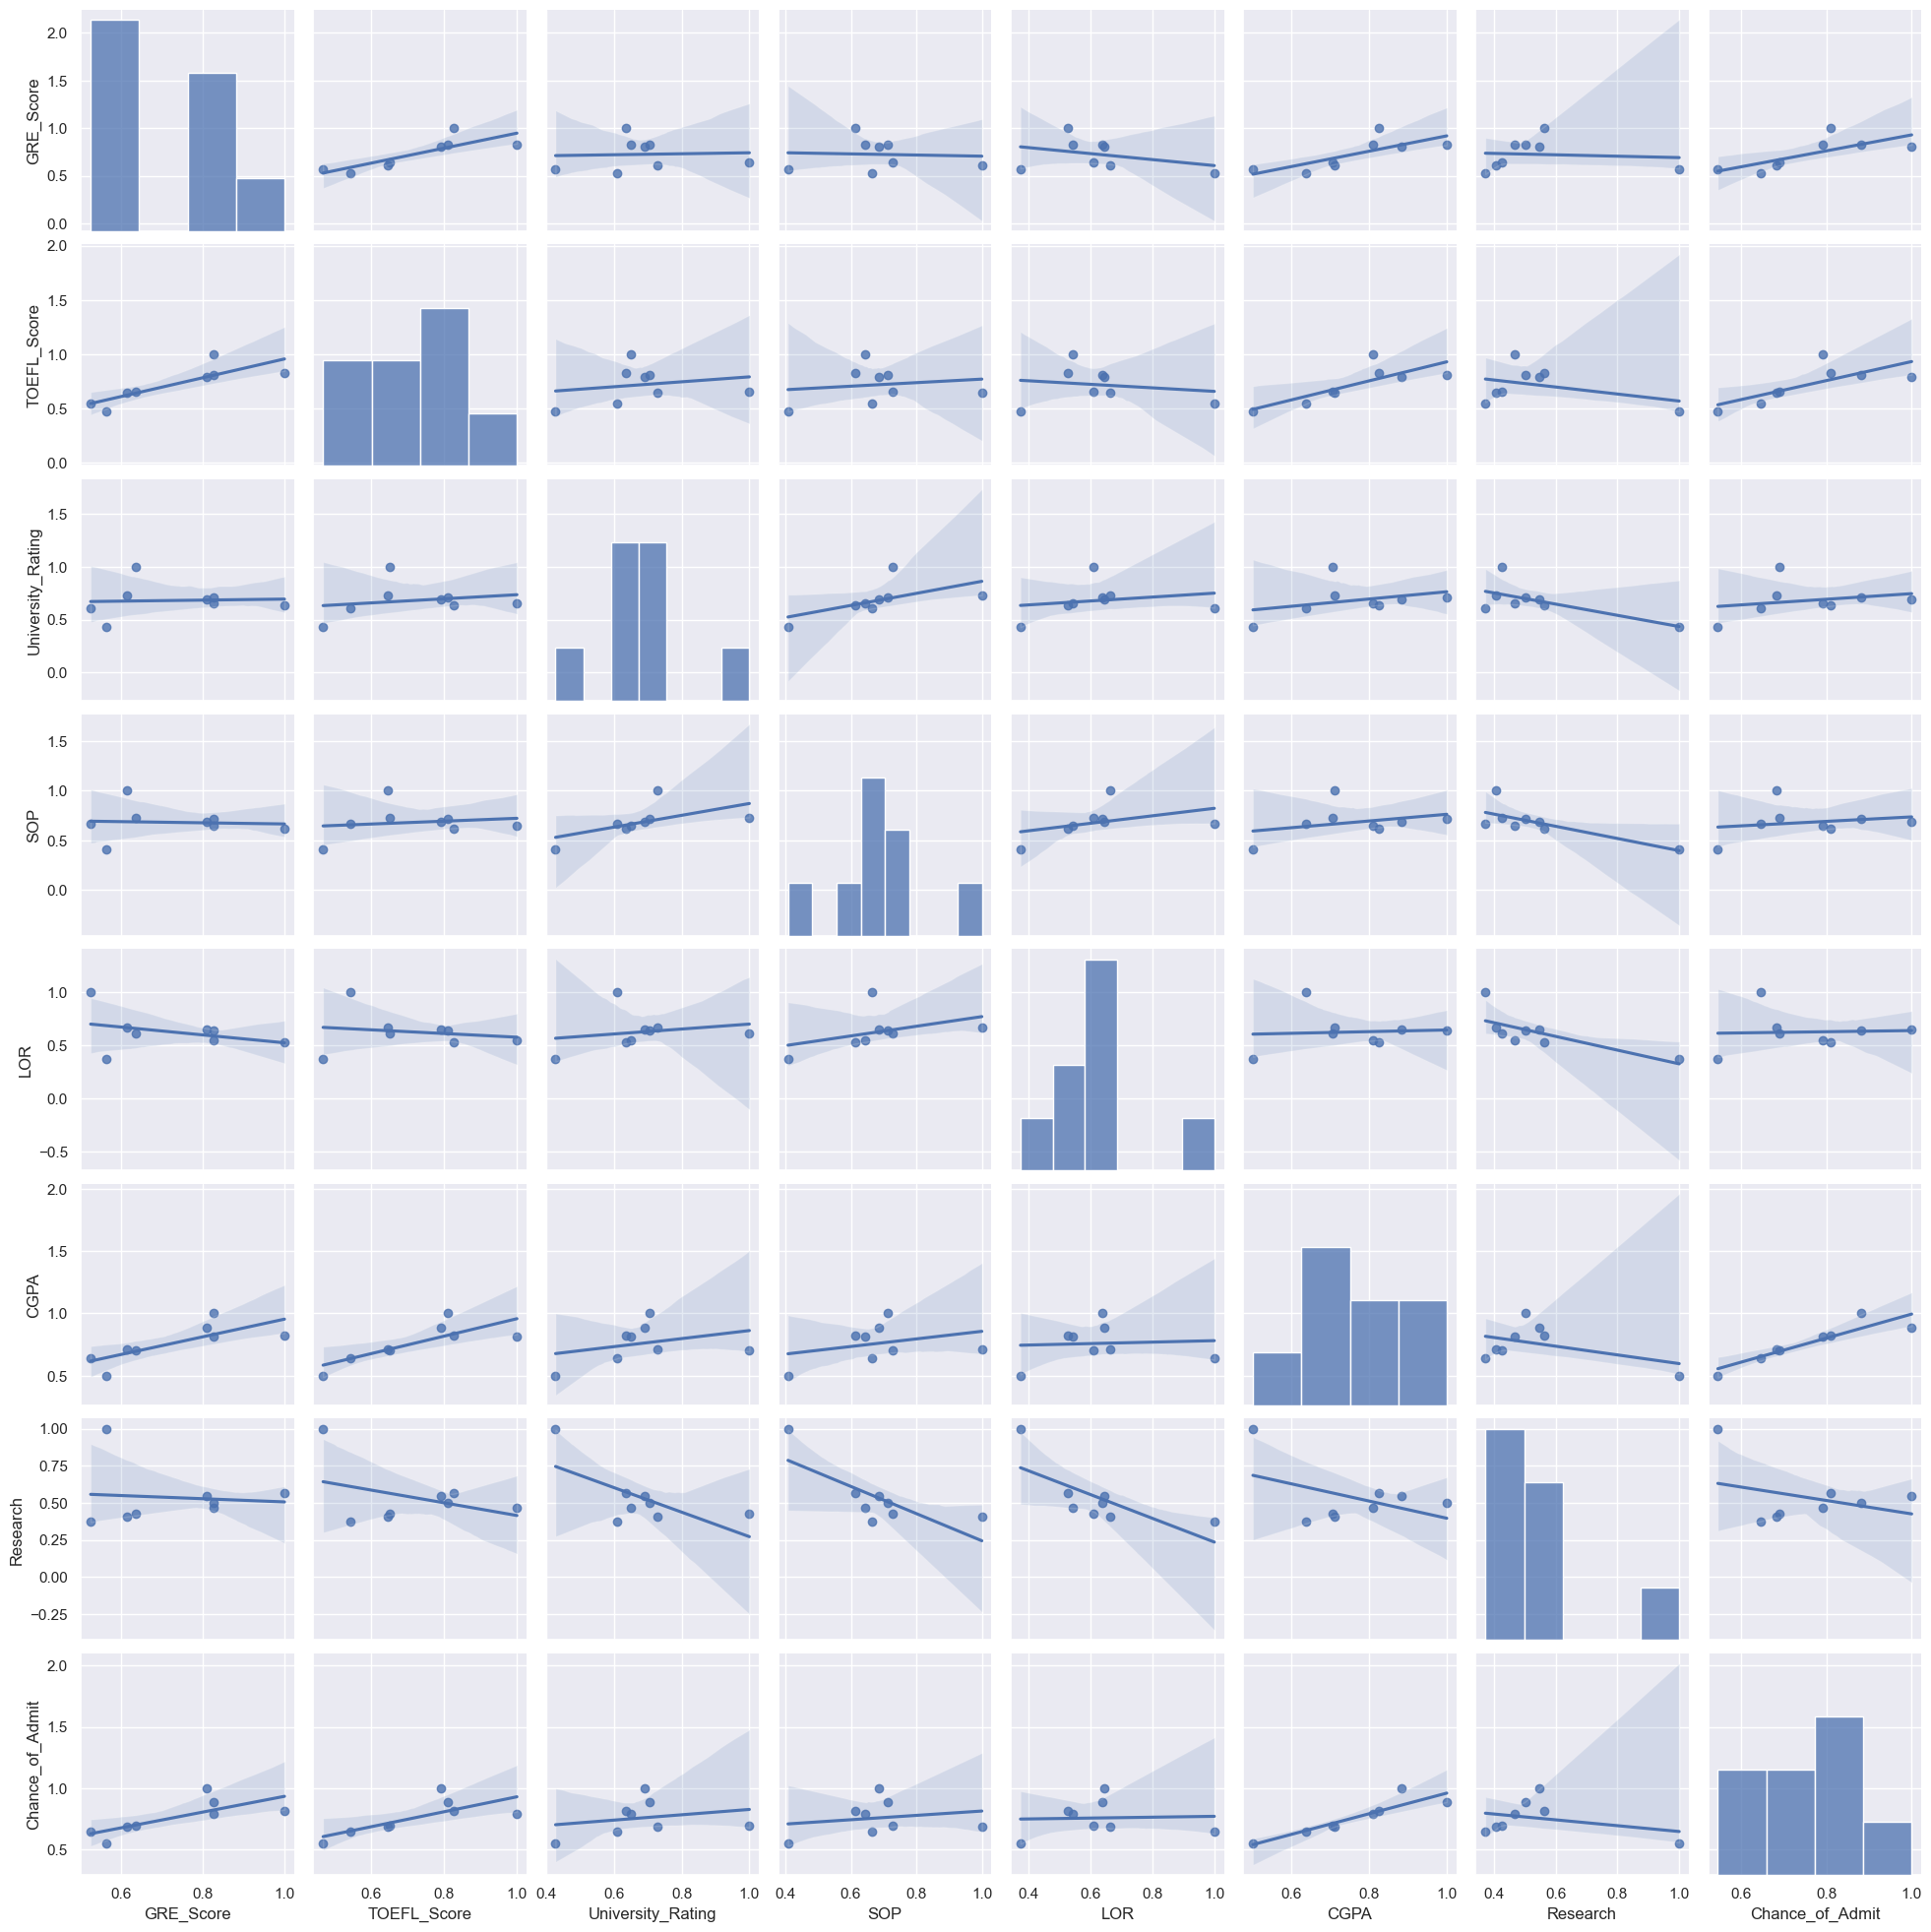

In [17]:
# Use pairplot to observe the linarity 
sns.pairplot(df.corr(),kind= 'reg');

* From the above both plots we can observe that;

* Independent Variables or (Input data) are: GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research

* Target/Dependent Variable is : Chance of Admit (the value we want to predict)

from above correlation heatmap , we can observe GRE score TOEFL score and CGPA have very high correlation with Change of admission.

University rating, SOP ,LOR and Research have comparatively slightly less correlated than other features.

## **Outliers in the data :**

In [18]:
#Create function for detecting the outliers;
def detect_outliers(data):
    
    length_before = len(data)
    
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)
    # Calculate Interquartile Range:
    IQR = Q3-Q1
    upperbound = Q3 + 1.5 * IQR
    lowerbound = Q1 - 1.5 * IQR
    if lowerbound < 0:
        lowerbound = 0
    
    length_after = len(data[(data>lowerbound)&(data<upperbound)])
    
    return f"{np.round((length_before - length_after) / length_before, 4)} % Outliers data from input data found"

In [19]:
for col in df.columns:
    print(col + "-> " + detect_outliers(df[col]))


GRE_Score-> 0.0 % Outliers data from input data found
TOEFL_Score-> 0.0 % Outliers data from input data found
University_Rating-> 0.0 % Outliers data from input data found
SOP-> 0.0 % Outliers data from input data found
LOR-> 0.024 % Outliers data from input data found
CGPA-> 0.0 % Outliers data from input data found
Research-> 0.44 % Outliers data from input data found
Chance_of_Admit-> 0.004 % Outliers data from input data found


In [20]:
detect_outliers(df)

'0.0 % Outliers data from input data found'

* **Conclusion:**
  
* There is no significant amount of outliers present in the dataset.

## **Descriptive analysis of all numerical features :**

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE_Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL_Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University_Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance_of_Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


* **Conclusion:**
* The Range for the GRE score feature is  between 290 to 340.
* The range for TOEFL score is between 92 to 120.
* University rating , SOP and LOR are distributed between range of 1 to 5.
* CGPA range is between 6.8 to 9.92.
* The Chance of admit is a probability measure , which is within 0 to 1 which is good (no outliers or missleading data in column).

# ***Univariate Analysis:***
(Distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)

In [22]:
cat_cols = ['University Rating', 'SOP', 'LOR ', 'Research']
num_cols = ['GRE_Score', 'TOEFL_Score', 'CGPA']
target = 'Chance of Admit'

Barplots/countplots of all the categorical variables:
**Distribution of all other categorical features :**

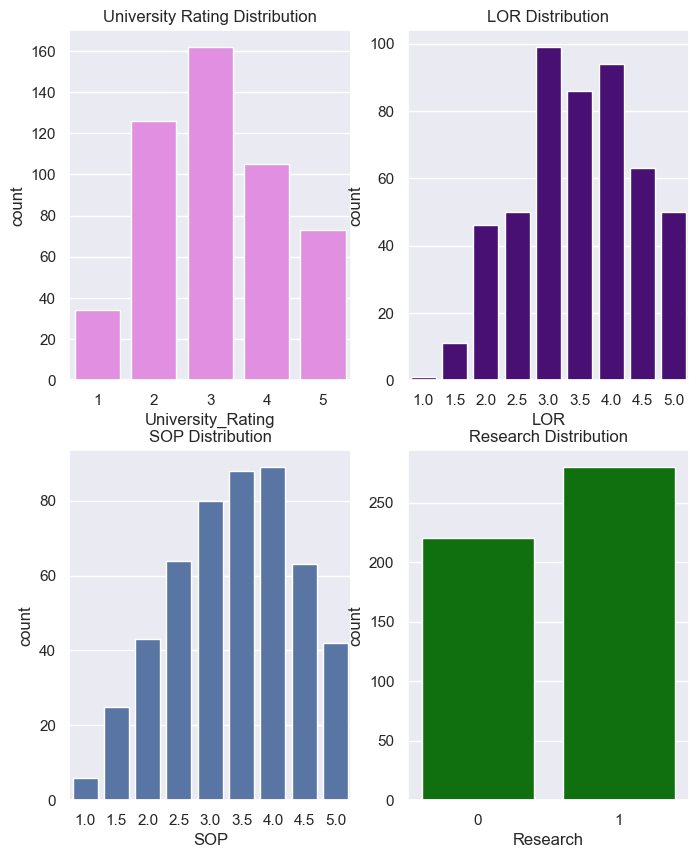

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 10))

sns.countplot(data=df, x='University_Rating', ax=ax[0, 0], color ='violet').set_title('University Rating Distribution')
sns.countplot(data=df, x='LOR', ax=ax[0, 1], color ='indigo').set_title('LOR Distribution')
sns.countplot(data=df, x='SOP', ax=ax[1, 0]).set_title('SOP Distribution')
sns.countplot(data=df, x='Research', ax=ax[1, 1], color ='green').set_title('Research Distribution')

plt.show()

Conclusion:
- 3 is the average Number of rating or reputation of the Universities that applicants are associated with.
- 3 is the average number of Letter of Recommendation Strength(LOR) which represents the strength of the applicant's letter of recommendation,
- 4 SOP represents the strength of the applicant's statement of purpose
- Most of the applicants have Research experience.



**Distribution plots of all the continuous variable(s):**

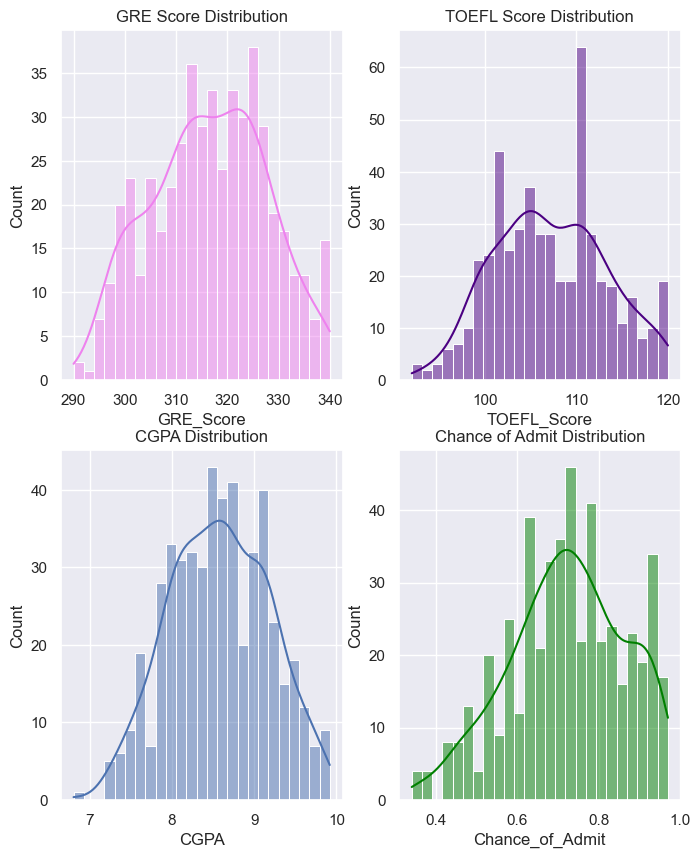

In [103]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 10))

sns.histplot(df['GRE_Score'],kde = True ,ax=ax[0, 0],bins = 25 ,color='violet').set_title('GRE Score Distribution')
sns.histplot(df['TOEFL_Score'],kde = True , ax=ax[0, 1],bins = 25 , color='indigo').set_title('TOEFL Score Distribution')
sns.histplot(df['CGPA'],kde = True ,bins = 25, ax=ax[1, 0]).set_title('CGPA Distribution')
sns.histplot(df['Chance_of_Admit'],kde = True ,bins = 25 , ax=ax[1, 1], color='green').set_title('Chance of Admit Distribution')

plt.show()

- Chance of admission(target variable) and GRE score(an independent feature) are nearly normally distrubted.

## **QQ Plot**

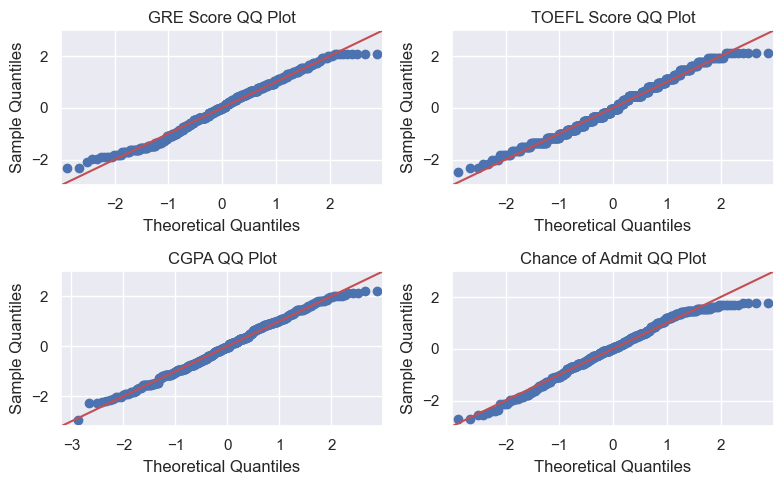

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 5))

sm.qqplot(df['GRE_Score'],fit = True,line = '45' , ax=ax[0, 0])
ax[0, 0].set_title('GRE Score QQ Plot')

sm.qqplot(df['TOEFL_Score'],fit = True,line = '45' , ax=ax[0, 1])
ax[0, 1].set_title('TOEFL Score QQ Plot')

sm.qqplot(df['CGPA'],fit = True,line = '45' , ax=ax[1, 0])
ax[1, 0].set_title('CGPA QQ Plot')

sm.qqplot(df['Chance_of_Admit'],fit = True,line = '45' , ax=ax[1, 1])
ax[1, 1].set_title('Chance of Admit QQ Plot')

plt.tight_layout()
plt.show()

# **Bivariate Analysis:**

ANALYSIS ON CHANCES OF ADMISSION VS DIFFERENT FEATURES:

WITH CATEGORICAL FEATURES:

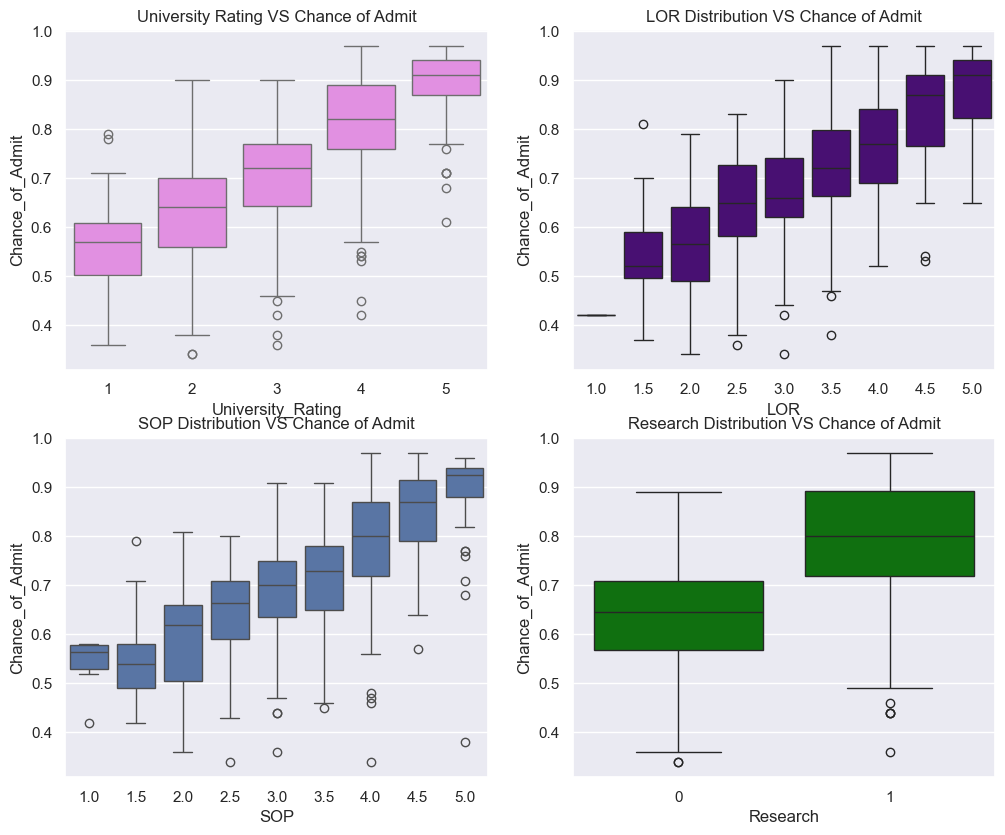

In [25]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 9.7))

sns.boxplot(data=df, x='University_Rating',y = 'Chance_of_Admit', ax=ax[0, 0], color ='violet').set_title('University Rating VS Chance of Admit')
sns.boxplot(data=df, x='LOR',y = 'Chance_of_Admit', ax=ax[0, 1], color ='indigo').set_title('LOR Distribution VS Chance of Admit')
sns.boxplot(data=df, x='SOP',y = 'Chance_of_Admit', ax=ax[1, 0]).set_title('SOP Distribution VS Chance of Admit')
sns.boxplot(data=df, x='Research',y = 'Chance_of_Admit', ax=ax[1, 1], color ='green').set_title('Research Distribution VS Chance of Admit')

plt.show()

**As you can see from the graphs, all graphs shows the increases trend of getting Admission.**

* From above plots, we can observe , statement of purpose SOP strength is positively correlated with Chance of Admission Feature.
* We also have similar pattern in Letter of Recommendation Stength and University rating , have positive correlation with Chaces of Admission.
* Students having Statement of Purpose and Letter of Recommendation Strength
SOP and LOR rating: 5, have higher chance of getting admissioned.
* Students who have the Rsearch Experience have more chances of  getting Admin as compared to other students who don't have the research experience.


## **WITH NUMERICAL FEATURES:**

---



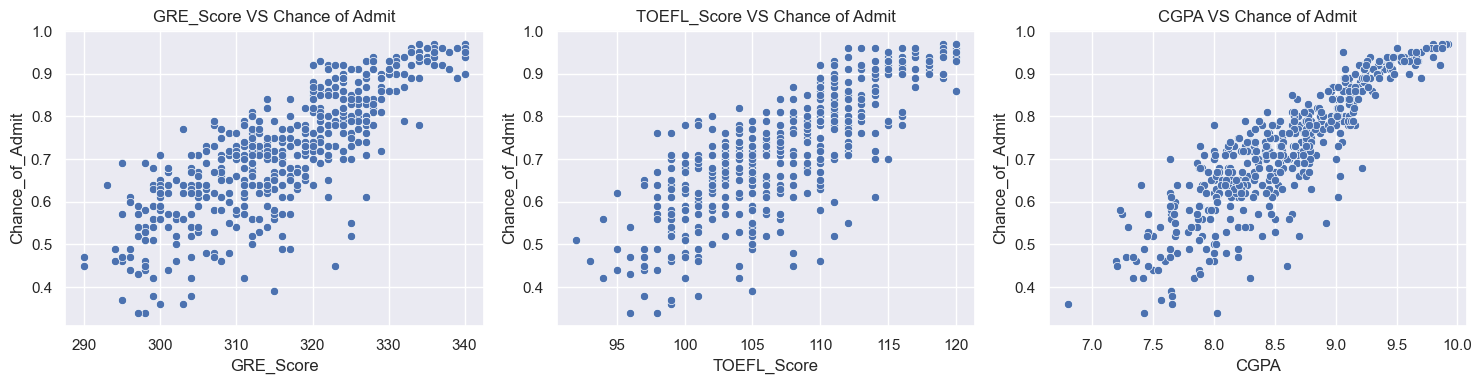

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

sns.scatterplot(data=df, x='GRE_Score', y='Chance_of_Admit', ax=ax[0]).set_title('GRE_Score VS Chance of Admit')
sns.scatterplot(data=df, x='TOEFL_Score', y='Chance_of_Admit', ax=ax[1]).set_title('TOEFL_Score VS Chance of Admit')
sns.scatterplot(data=df, x='CGPA', y='Chance_of_Admit', ax=ax[2]).set_title('CGPA VS Chance of Admit')

plt.tight_layout()
plt.show()

* From above SCATTERPLOT (distribution of chance of admition (probability of getting admition) as per GRE score ):
with higher GRE score , there is high probability of getting an admition.
* From above SCATTERPLOT (distribution of chance of admition (probability of getting admition) as per CGPA  ):
with higher CGPA , there is high probability of getting an admition.
* From above SCATTERPLOT (distribution of chance of admition (probability of getting admition) as per Test of English as a Foreign Language score ):
with higher TOEFL score , there is high probability of getting an admition.

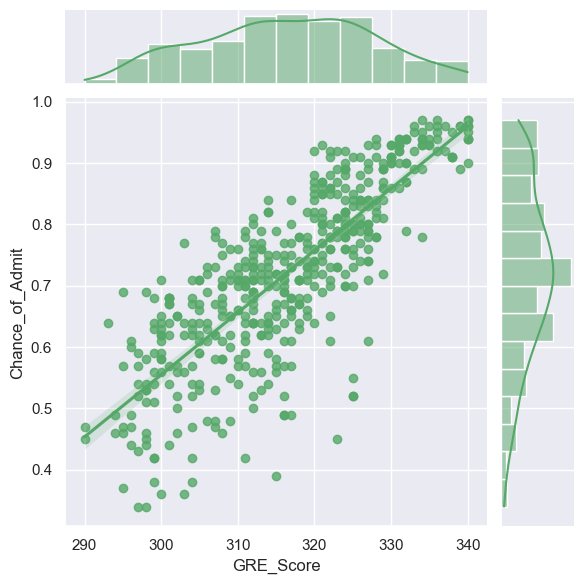

In [27]:
# Joint plot:
sns.jointplot(x = df["GRE_Score"],y = df["Chance_of_Admit"], kind = "reg" ,color='g');

## **MULTIVARIATE ANALYSIS:**

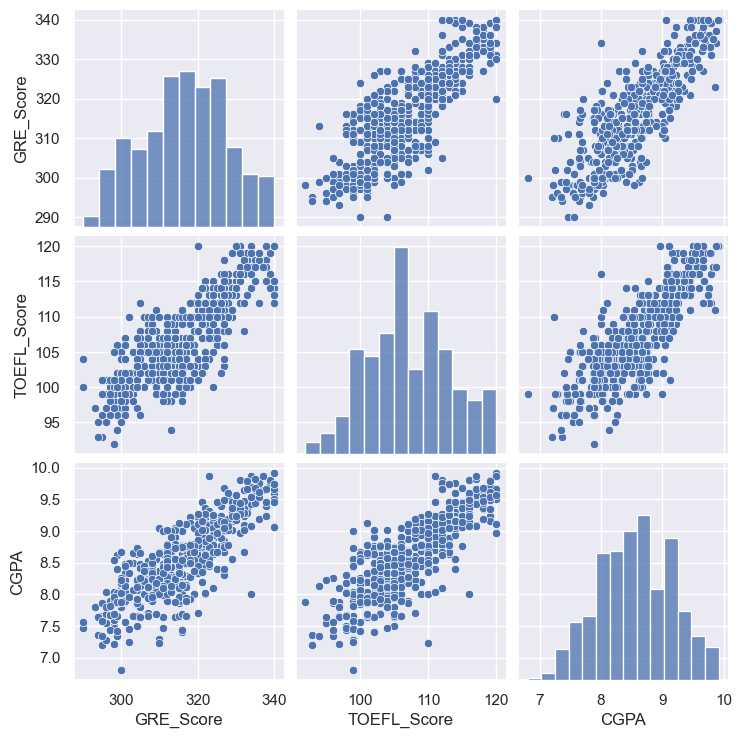

In [28]:
sns.pairplot(df[num_cols])
plt.show()

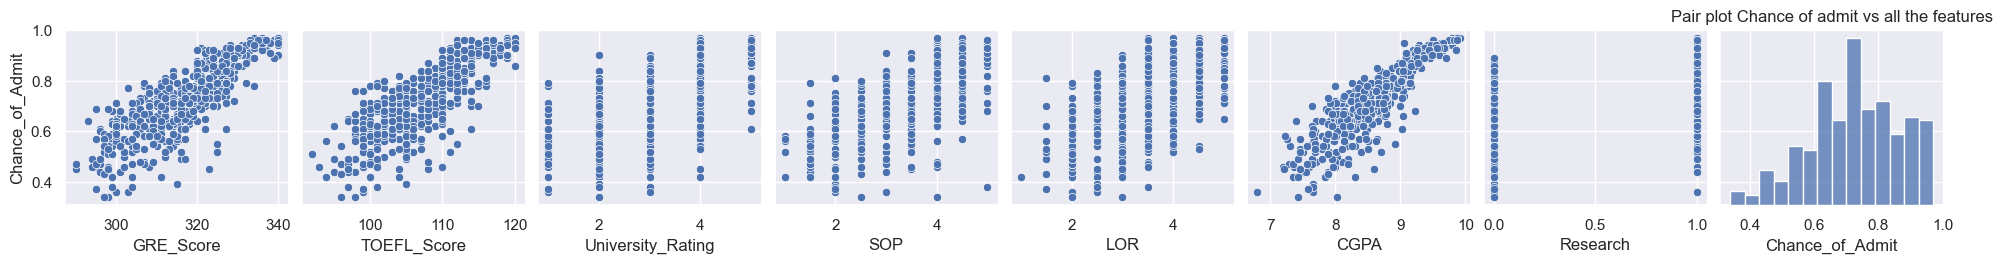

In [29]:
sns.pairplot(df, y_vars = ["Chance_of_Admit"])
plt.title("Pair plot Chance of admit vs all the features")
plt.show()

In [110]:
df.corr().round(2)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
GRE_Score,1.00,0.83,0.64,0.61,0.52,0.83,0.56,0.81
TOEFL_Score,0.83,1.00,0.65,0.64,0.54,0.81,0.47,0.79
University_Rating,0.64,0.65,1.00,0.73,0.61,0.71,0.43,0.69
SOP,0.61,0.64,0.73,1.00,0.66,0.71,0.41,0.68
LOR,0.52,0.54,0.61,0.66,1.00,0.64,0.37,0.65
CGPA,0.83,0.81,0.71,0.71,0.64,1.00,0.50,0.88
Research,0.56,0.47,0.43,0.41,0.37,0.50,1.00,0.55
Chance_of_Admit,0.81,0.79,0.69,0.68,0.65,0.88,0.55,1.00


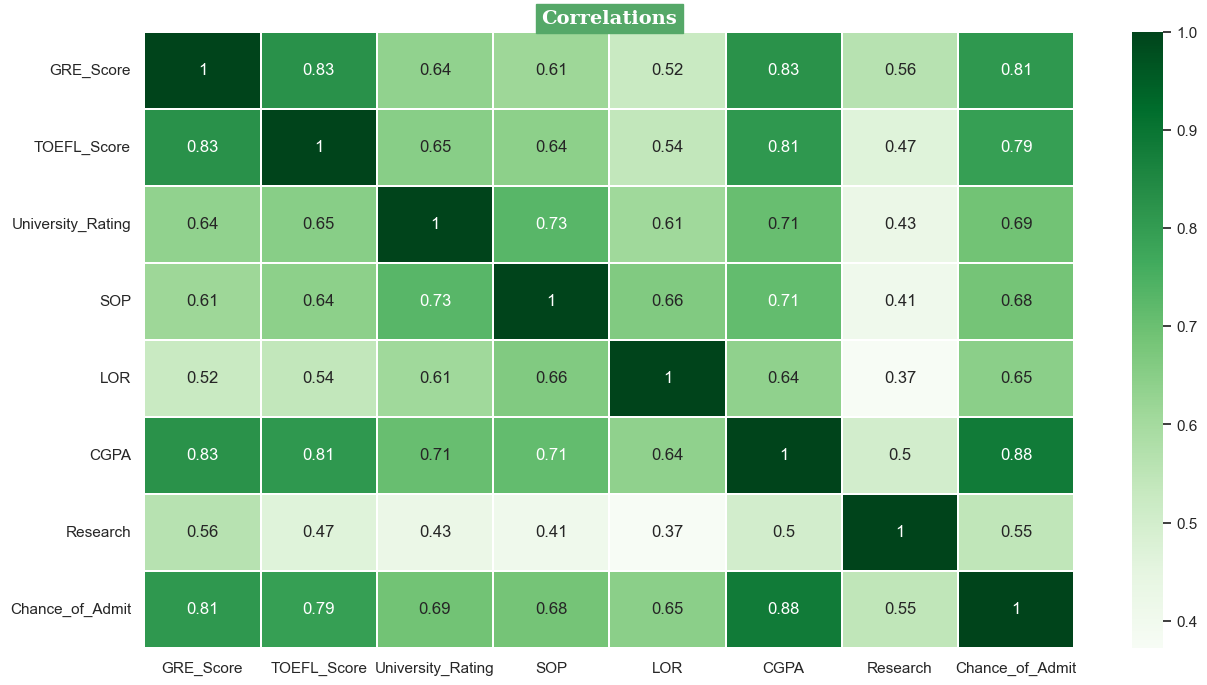

In [32]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True ,cmap = 'Greens', linewidths = 0.1)
plt.title(f'Correlations',fontsize=14, fontfamily='serif', fontweight='bold', backgroundcolor='g',color='w')
plt.yticks(rotation=0)
plt.xticks(rotation = 0)
plt.show()

From the above all observation are:
* By the correlation heatmap , We can observe GRE_score ,TOEFL_score and CGPA have very high correlation with Change of admission.

* University rating, SOP ,LOR and Research are comparatively slightly less correlated than other features.

* Independent Variables (Input datas): GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research

* Target/Dependent Variable : Chance of Admit (the value we want to predict)

By observing the joint plots, we can gain insights into the relationship between each independent variable and The target variable.

Here are the observations that we can make from the joint plots:
* GRE , TOEFl score, CGPA VS CHANCE OF ADMISSION: It shows the positive relatioinship between the them, relationship is linear and there are some outlier also present.

## **Checking for Linearity : How features are correlated with Target variable - chance of admit :**

GRE_Score


<Figure size 300x300 with 0 Axes>

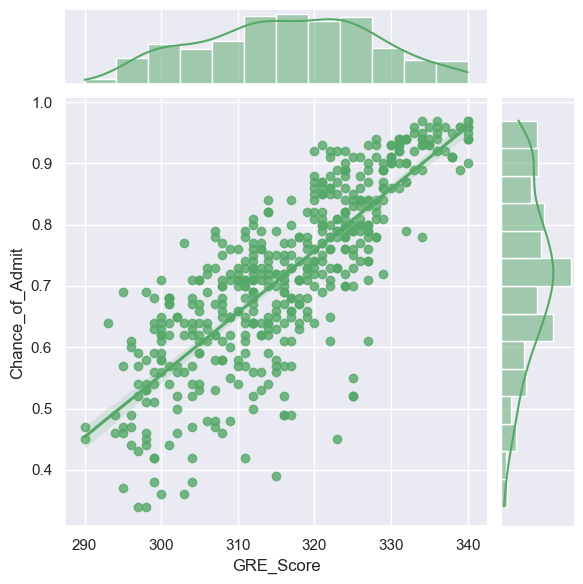

TOEFL_Score


<Figure size 300x300 with 0 Axes>

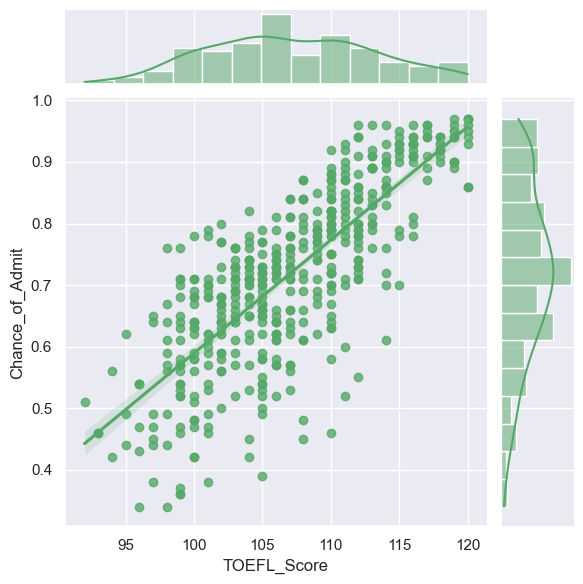

University_Rating


<Figure size 300x300 with 0 Axes>

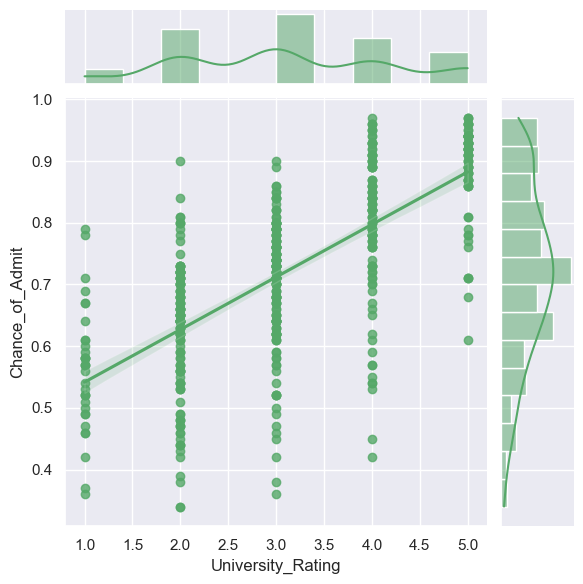

SOP


<Figure size 300x300 with 0 Axes>

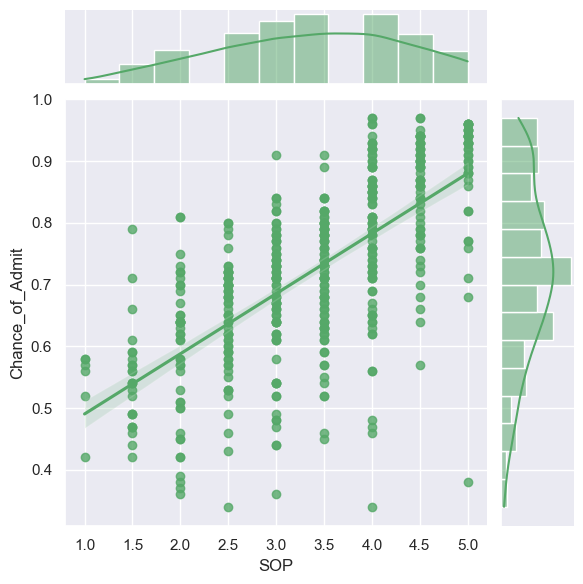

LOR


<Figure size 300x300 with 0 Axes>

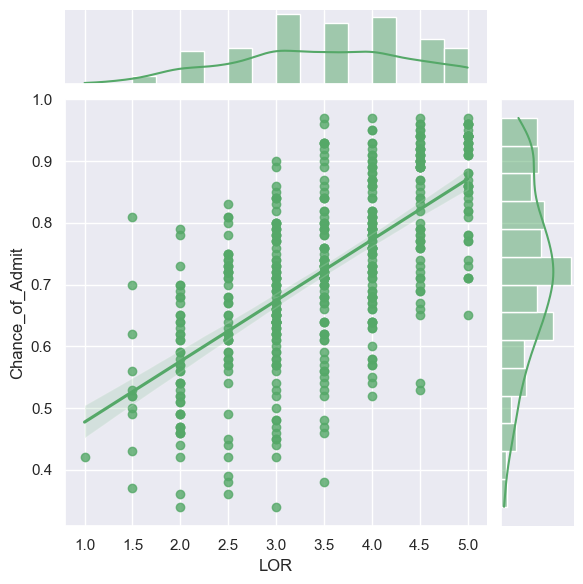

CGPA


<Figure size 300x300 with 0 Axes>

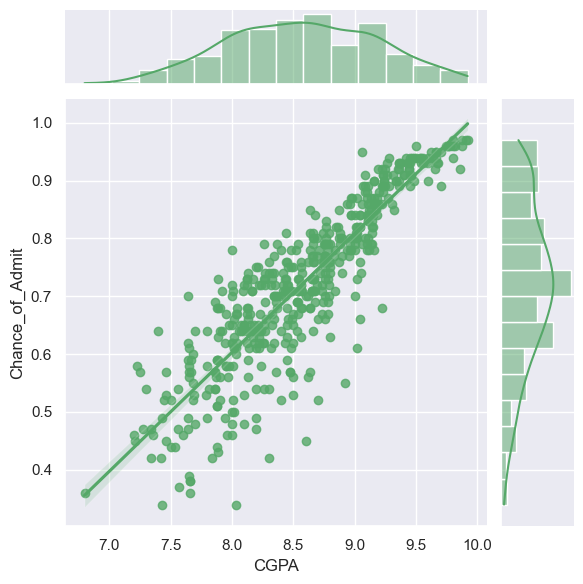

Research


<Figure size 300x300 with 0 Axes>

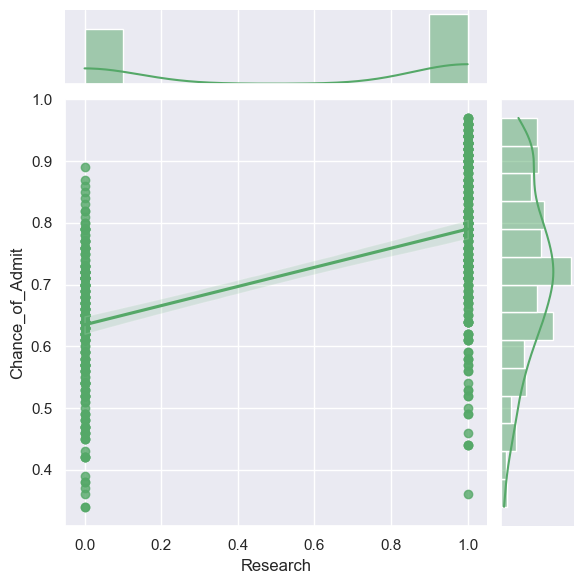

Chance_of_Admit


<Figure size 300x300 with 0 Axes>

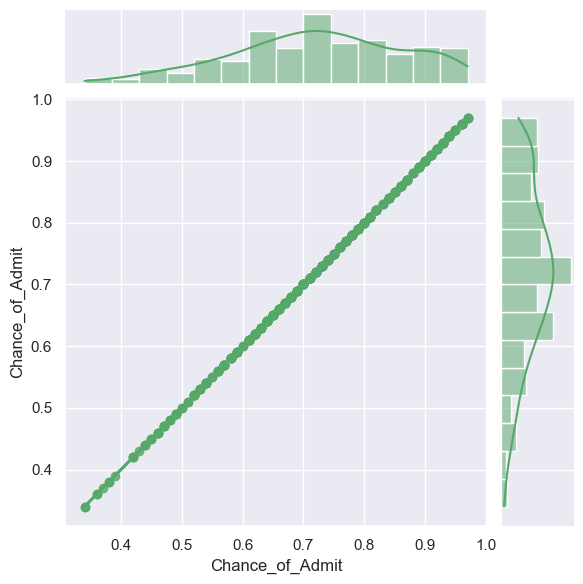

In [33]:
for col in df.columns:
    print(col)
    plt.figure(figsize=(3,3))
    sns.jointplot(x = df[col], y = df["Chance_of_Admit"], kind="reg", color = 'g')
    plt.show()

* with higher GRE score , there is high probability of getting an admition.

* Students having high toefl score , has higher probability of getting admition .

# **Data Preprocessing**

**Duplicate value check**

---



In [34]:
df.duplicated().sum()

0

* There are No Duplicated values present in the dataset

## **Missing value Treatment(If Present)**

---

In [35]:
df.isna().sum()

GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

* There is Null Values Present in the dataset


# **Data preprocessing for modeling**

---



In [37]:
df1 = df.copy()

In [36]:
# Import alll the necessary library

from scipy import stats

from sklearn.preprocessing import StandardScaler
# Model
from sklearn.linear_model import LinearRegression
# split
from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Important metrics:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error, adjusted_mutual_info_score
from sklearn.feature_selection import f_regression
# Regularization techniques:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [38]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df1), columns = df.columns)

In [39]:
x = scaled_df.iloc[:,:-1]
y = scaled_df.iloc[:,-1]
print(x.shape , y.shape)

(500, 7) (500,)


In [40]:
# Split the data into training and test data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of x_test: {x_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of x_train: (400, 7)
Shape of x_test: (100, 7)
Shape of y_train: (400,)
Shape of y_test: (100,)


### **Model building:**
 - Build the Linear Regression model and comment on the model statistics
 - Display model coefficients with column names
 - Try out Ridge and Lasso regression

In [41]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [47]:
# Predicting values for the training and test data
y_pred_train = lr_model.predict(x_train)
y_pred_test = lr_model.predict(x_test)

In [43]:
# Check the r2 score on trian data:
print('R2-Score On Train data:', r2_score(y_train, lr_model.predict(x_train)))

# Check the r2 score on test data:
print('R2-Score on Test data:', r2_score(y_test, lr_model.predict(x_test)))

R2-Score On Train data: 0.8210671369321554
R2-Score on Test data: 0.8188432567829627


### All the feature's coefficients and Intercept :

In [44]:
lr_model_weights = pd.DataFrame(lr_model.coef_.reshape(1,-1),columns=df.columns[:-1])
lr_model_weights["Intercept"] = lr_model.intercept_
lr_model_weights

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Intercept
0,0.194823,0.129095,0.020812,0.012735,0.113028,0.482199,0.084586,0.007736


In [123]:
# Make predictions using test data:
y_pred = model.predict(X_test)

#### Insights:

* CGPA,GRE,TOEFL scores have the highest weight
* SOP, University rating, and research have the lowest weights
* W0 - intercept is low

### Adjusted R2 score:

In [45]:
def model_evaluation(y_actual, y_forecast, model):
    n = len(y_actual)
    if len(model.coef_.shape)==1:
        p = len(model.coef_)
    else:
        p = len(model.coef_[0])
        
    MSE = np.round(mean_squared_error(y_true= y_actual,y_pred = y_forecast,squared=True),2)
    MAE = np.round(mean_absolute_error(y_true=y_actual, y_pred=y_forecast),2)
    RMSE = np.round(mean_squared_error(y_true=y_actual,y_pred=y_forecast, squared=False),2)
    r2 = np.round(r2_score(y_true=y_actual, y_pred=y_forecast),2)
    adj_r2 = np.round(1 - ((1-r2)*(n-1)/(n-p-1)),2)
    
    return print(f"MSE: {MSE}\nMAE: {MAE}\nRMSE: {RMSE}\nR2 Score: {r2}\nAdjusted R2: {adj_r2}")

In [48]:
model_evaluation(y_train.values, y_pred_train, lr_model)

MSE: 0.18
MAE: 0.3
RMSE: 0.42
R2 Score: 0.82
Adjusted R2: 0.82


In [50]:
model_evaluation(y_test.values, y_pred_test, lr_model)

MSE: 0.19
MAE: 0.3
RMSE: 0.43
R2 Score: 0.82
Adjusted R2: 0.81


#### Insights:

- Since there is `No difference` in the loss scores of training and test data, we can conclude that there is `NO overfitting` of the model.


## Linear Regression using OLS REPORT:

In [52]:
df1.columns[:-1]

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

In [53]:
new_x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, new_x_train)
results = model.fit()

# statstical summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Fri, 31 May 2024   Prob (F-statistic):          3.41e-142
Time:                        17:20:28   Log-Likelihood:                -221.69
No. Observations:                 400   AIC:                             459.4
Df Residuals:                     392   BIC:                             491.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0077      0.02

In [130]:
import statsmodels.api as sm 
_ols = sm.add_constant(x_ols_df) 
model = sm.OLS(y_ols_df, x_ols_df).fit() 
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:        Chance_of_Admit   R-squared (uncentered):                   0.036
Model:                            OLS   Adj. R-squared (uncentered):              0.018
Method:                 Least Squares   F-statistic:                              2.067
Date:                Fri, 31 May 2024   Prob (F-statistic):                      0.0461
Time:                        16:59:47   Log-Likelihood:                         -438.63
No. Observations:                 400   AIC:                                      891.3
Df Residuals:                     393   BIC:                                      919.2
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

#### Conidering the very low p_valued Features and highly weighted coef features as the major contributers of Model Prediction, `CGPA,GRE,TOEFL,LOR` are the features contributing to model building...

# Testing Assumption Of Linear Regression:

1. **No multicolinearity:** 
    >   Multicollinearity check by VIF(Variance Inflation Factor) score.   
    >   Variables are dropped one-by-one till none has a VIF>5.
    
    
2. **Mean of Residuals** should be close to zero.



3. Linear relationship between independent & dependent variables.

    - This can be checked using the following methods:  
        - Scatter plots  
        - Regression plots  
        - Pearson Correlation  
    
    
4. Test for **Homoscedasticity**

    - Create a scatterplot of residuals against predicted values.
   
5. Normality of Residuals

    - Almost bell-shaped curve in residuals distribution.
    
6. Impact of **Outliers**

#### **Multicollinearity check :**
------

In [54]:
# Import library to check for vif scores;
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
x_t = pd.DataFrame(x_train, columns = df1.columns[:7])
vif = pd.DataFrame()
vif['features'] = x_t.columns
vif['vif'] = [variance_inflation_factor(x_t.values, i) for i in range(x_t.shape[1])]

In [57]:
vif

,features,vif
0,GRE_Score,4.489201
1,TOEFL_Score,3.665067
2,University_Rating,2.571847
3,SOP,2.785753
4,LOR,1.977668
5,CGPA,4.653698
6,Research,1.517206


All the vif (Variance inflatioin factor are below 5 , Thus data does not have very high multicolinearity)

#### **Residual Analysis OR Error Analysis:**

* Error or Residuals:

In [59]:
# Calculate residuals for train:
residual_tr = (y_train - y_pred_train)
residual_tr.mean()

1.2212453270876722e-17

In [60]:
# Calculate residuals:
residual_tst = (y_test - y_pred_test)
residual_tst.mean()

-0.03867840379282763

### Insights:

- Since the mean of residuals is very close to 0, we can say that the model is `UnBiased`.

-----

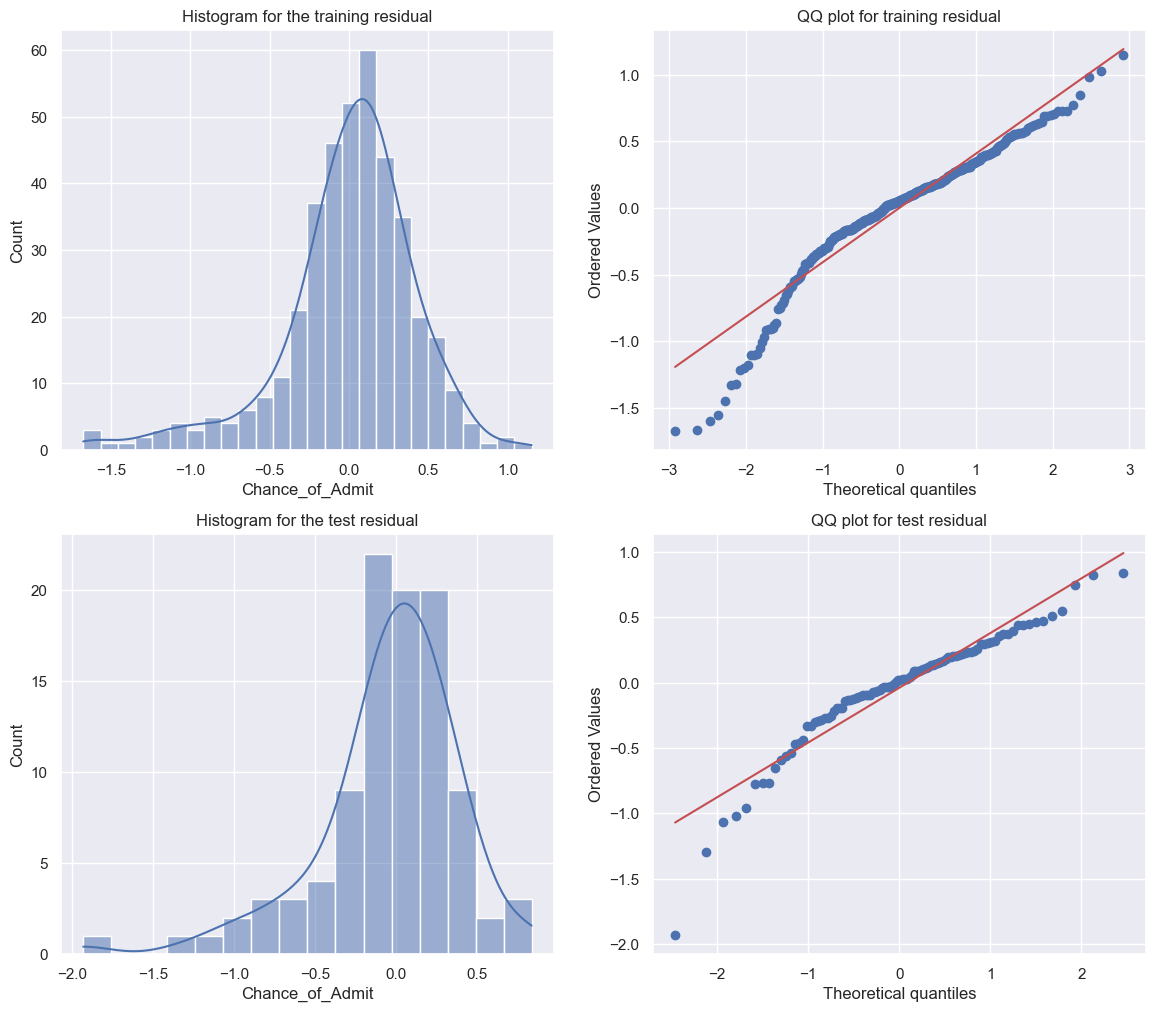

In [63]:
plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
sns.histplot(residual_tr,kde = True)
plt.title('Histogram for the training residual')

plt.subplot(2,2,2)
stats.probplot(residual_tr, plot = plt)
plt.title('QQ plot for training residual')


plt.subplot(2,2,3)
sns.histplot(residual_tst,kde = True)
plt.title('Histogram for the test residual')

plt.subplot(2,2,4)
stats.probplot(residual_tst, plot = plt)
plt.title('QQ plot for test residual')

plt.show()

From the Histplot & kdeplot for the test data , we can see that the Residuals are left skewed and not perfectly normally distributed.

The QQ plot shows that residuals are slightly deviating from the straight diagonal , thus not Gaussian.

#### The Mean of Residuals is Nearly Zero?

In [65]:
# The Mean of residulas
residual_tst.mean(), residual_tr.mean()

(-0.03867840379282763, 1.2212453270876722e-17)

* **Conclusion:**
- By examing the difference between the y_actual and y_predicted value, it is observed that the mean of the Errors are approximately been vary close to Zero.
- Which suggests that, on average, the model is not systematically underestimating or overestimating the target variable. A mean residual close to zero indicates that the model is making predictions that are, on average, accurate.

#### **Linearity of varibales:**
----

* Linearity of variables refers to the assumption that there is a linear relationship between the independent variables and the dependent variable in a regression model.
* It means that the effect of the independent variables on the dependent variable is constant across different levels of the independent variables.

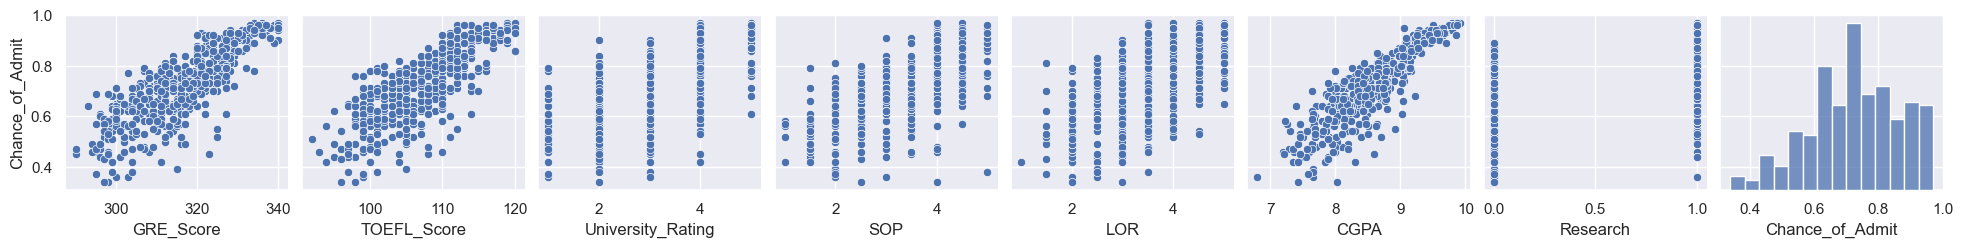

In [67]:
sns.pairplot(df1,y_vars = ['Chance_of_Admit'])
plt.show()

### insights:
    
- From the Joint plot & pairplot in the graphical analysis, we can say that there is linear relationship between dependent variable and independent variables.

- As we can observe, GRE Score, TOEFL Score and CGPA have a linear relationship with the Chance of Admit. Although GRE score and TOEFL score are more scattered, CGPA has a much more more linear relationship with the Chance of Admit.

### **Test of homoscedasticity (Plotting y_predicted and residuals)**
-----
* Homoscedasticity refers to the assumption in regression analysis that the variance of the residuals (or errors) should be constant across all levels of the independent variables. In simpler terms, it means that the spread of the residuals should be similar across different values of the predictors.

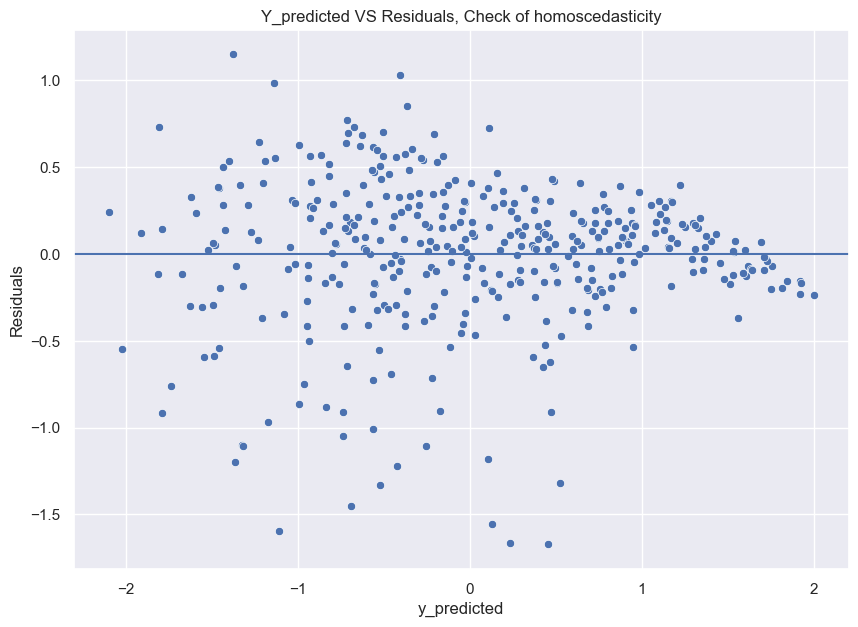

In [69]:
# y_predict = y_predict.reshape(-1)
# residual = residual.reshape(-1)
residual = residual_tr
plt.figure(figsize=(10,7))
sns.scatterplot(x = y_pred_train, y = residual)
plt.xlabel('y_predicted')
plt.ylabel('Residuals')
plt.axhline(y=0)
plt.title("Y_predicted VS Residuals, Check of homoscedasticity")
plt.show()

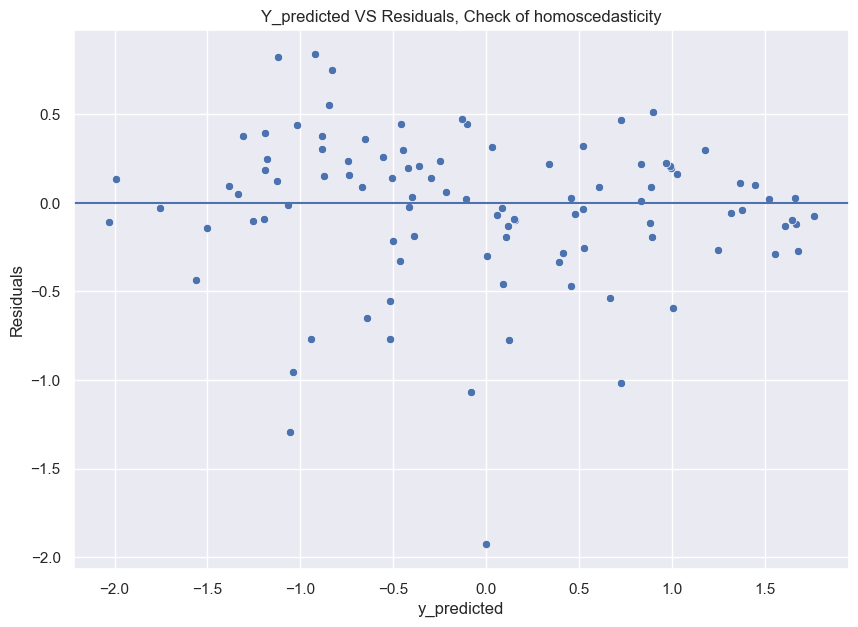

In [70]:
# y_predict = y_predict.reshape(-1)
# residual = residual.reshape(-1)
residuals = residual_tst
plt.figure(figsize=(10,7))
sns.scatterplot(x = y_pred_test, y = residuals)
plt.xlabel('y_predicted')
plt.ylabel('Residuals')
plt.axhline(y=0)
plt.title("Y_predicted VS Residuals, Check of homoscedasticity")
plt.show()

# **Model Regularisation :**

### L1 Regularization(LASSO REGRESSION):

In [ ]:
# # Hyperparameter Tuning : for appropriate lambda value :

# train_R2_score = []
# test_R2_score = []

# train_test_difference_Of_R2 =  []
# lambda_values = np.arange(0.001,5,0.1)

# for lambdas in lambda_values:
#     LassoModel = Lasso(lambdas)
#     LassoModel.fit(X_train,y_train)

#     trainR2 = LassoModel.score(x_train,y_train)
#     testR2 = LassoModel.score(x_test,y_test)

#     train_R2_score.append(trainR2)
#     test_R2_score.append(testR2)

#     train_test_difference_Of_R2.append(trainR2- testR2)

In [74]:
model_lasso = Lasso(alpha=0.001)
model_lasso.fit(x_train, y_train)

Lasso(alpha=0.001)

In [75]:
y_pred_train_lasso = model_lasso.predict(x_train)
y_pred_test_lasso = model_lasso.predict(x_test)

In [76]:
lasso_model_weights = pd.DataFrame(model_lasso.coef_.reshape(1,-1),columns=df.columns[:-1])
lasso_model_weights["Intercept"] = model_lasso.intercept_
lasso_model_weights

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Intercept
0,0.194566,0.128838,0.020637,0.012529,0.112532,0.482447,0.08405,0.007738


# L2 Regularization(RIDGE REGRESSION):

In [ ]:
# Hyperparameter Tuning : for appropriate lambda value :

train_R2_score = []
test_R2_score = []

train_test_difference_Of_R2 =  []
lambda_values = np.arange(0.001,5,0.1)

for lambdas in lambda_values:
    RidgeModel = Ridge(lambdas)
    RidgeModel.fit(X_train,y_train)

    trainR2 = RidgeModel.score(X_train,y_train)
    testR2 = RidgeModel.score(X_test,y_test)

    train_R2_score.append(trainR2)
    test_R2_score.append(testR2)

    train_test_difference_Of_R2.append(trainR2- testR2)

In [77]:
model_ridge = Ridge()
model_ridge.fit(x_train, y_train)

Ridge()

In [78]:
y_pred_train_ridge = model_ridge.predict(x_train)
y_pred_test_ridge = model_ridge.predict(x_test)

In [79]:
ridge_model_weights = pd.DataFrame(model_ridge.coef_.reshape(1,-1),columns=df.columns[:-1])
ridge_model_weights["Intercept"] = model_ridge.intercept_
ridge_model_weights

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Intercept
0,0.195584,0.130073,0.021575,0.013802,0.113221,0.478123,0.084673,0.007726


In [80]:
print('Linear Regression Training Accuracy\n')
model_evaluation(y_train.values, y_pred_train, lr_model)
print('*'*25)
print('\nLinear Regression Test Accuracy\n')
model_evaluation(y_test.values, y_pred_test, lr_model)
print('---'*25)
print('\nRidge Regression Training Accuracy\n')
model_evaluation(y_train.values, y_pred_train_ridge, model_ridge)
print('*'*25)
print('\n\nRidge Regression Test Accuracy\n')
model_evaluation(y_test.values, y_pred_test_ridge, model_ridge)
print('---'*25)
print('\n\nLasso Regression Training Accuracy\n')
model_evaluation(y_train.values, y_pred_train_lasso, model_lasso)
print('*'*25)
print('\n\nLasso Regression Test Accuracy\n')
model_evaluation(y_test.values, y_pred_test_lasso, model_lasso)
print('---'*25)

Linear Regression Training Accuracy

MSE: 0.18
MAE: 0.3
RMSE: 0.42
R2 Score: 0.82
Adjusted R2: 0.82
*************************

Linear Regression Test Accuracy

MSE: 0.19
MAE: 0.3
RMSE: 0.43
R2 Score: 0.82
Adjusted R2: 0.81
---------------------------------------------------------------------------

Ridge Regression Training Accuracy

MSE: 0.18
MAE: 0.3
RMSE: 0.42
R2 Score: 0.82
Adjusted R2: 0.82
*************************


Ridge Regression Test Accuracy

MSE: 0.19
MAE: 0.3
RMSE: 0.43
R2 Score: 0.82
Adjusted R2: 0.81
---------------------------------------------------------------------------


Lasso Regression Training Accuracy

MSE: 0.18
MAE: 0.3
RMSE: 0.42
R2 Score: 0.82
Adjusted R2: 0.82
*************************


Lasso Regression Test Accuracy

MSE: 0.19
MAE: 0.3
RMSE: 0.43
R2 Score: 0.82
Adjusted R2: 0.81
---------------------------------------------------------------------------


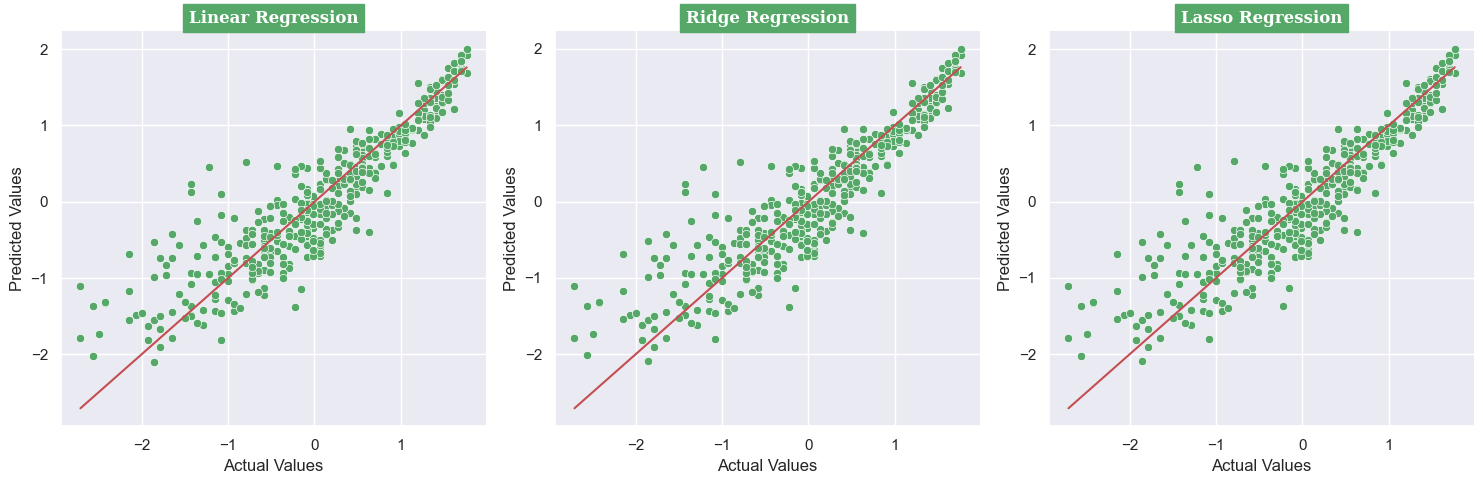

In [81]:
actual_values = y_train.values.reshape((-1,))
predicted_values = [y_pred_train.reshape((-1,)), y_pred_train_ridge.reshape((-1,)), y_pred_train_lasso.reshape((-1,))]
model = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
plt.figure(figsize=(15,5))
i=1
for preds in predicted_values:
    plt.subplot(1,3,i)
    sns.scatterplot(x=actual_values, y=preds,color='g')
    plt.plot([np.min(actual_values), np.max(actual_values)], [np.min(actual_values), np.max(actual_values)], 'r-')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(model[i-1],fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
    i+=1
plt.tight_layout()
sns.despine()
plt.show();

# ElasticNet
(L1 and L2 regularisation):

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# Define a range of alpha values to search over
alpha_range = [0.001, 0.01, 0.1, 1.0, 10.0]

# Create ElasticNet regression model
elastic_net = ElasticNet()

# Define grid search parameters
param_grid = {'alpha': alpha_range}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']

In [84]:
best_alpha

0.01

In [85]:
ElasticNet_model = ElasticNet(alpha=0.01)
ElasticNet_model.fit(x_train , y_train)

ElasticNet(alpha=0.01)

In [86]:
y_pred_train_en = ElasticNet_model.predict(x_train)
y_pred_test_en = ElasticNet_model.predict(x_test)

In [87]:
train_R2 = ElasticNet_model.score(x_train,y_train)
test_R2 = ElasticNet_model.score(x_test,y_test)
train_R2 , test_R2

(0.8210046567021085, 0.8190766036183178)

In [88]:
en_model_weights = pd.DataFrame(ElasticNet_model.coef_.reshape(1,-1),columns=df.columns[:-1])
en_model_weights["Intercept"] = ElasticNet_model.intercept_
en_model_weights

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Intercept
0,0.195306,0.129836,0.021476,0.013822,0.110995,0.475051,0.082018,0.007723


In [89]:
print('ElasticNet Regression Training Accuracy\n')
model_evaluation(y_train.values, y_pred_train_en, ElasticNet_model)
print('-'*25)
print('\nElasticNet Regression Test Accuracy\n')
model_evaluation(y_test.values, y_pred_test_en, ElasticNet_model)
print('---'*25)

ElasticNet Regression Training Accuracy

MSE: 0.18
MAE: 0.3
RMSE: 0.42
R2 Score: 0.82
Adjusted R2: 0.82
-------------------------

ElasticNet Regression Test Accuracy

MSE: 0.19
MAE: 0.3
RMSE: 0.43
R2 Score: 0.82
Adjusted R2: 0.81
---------------------------------------------------------------------------


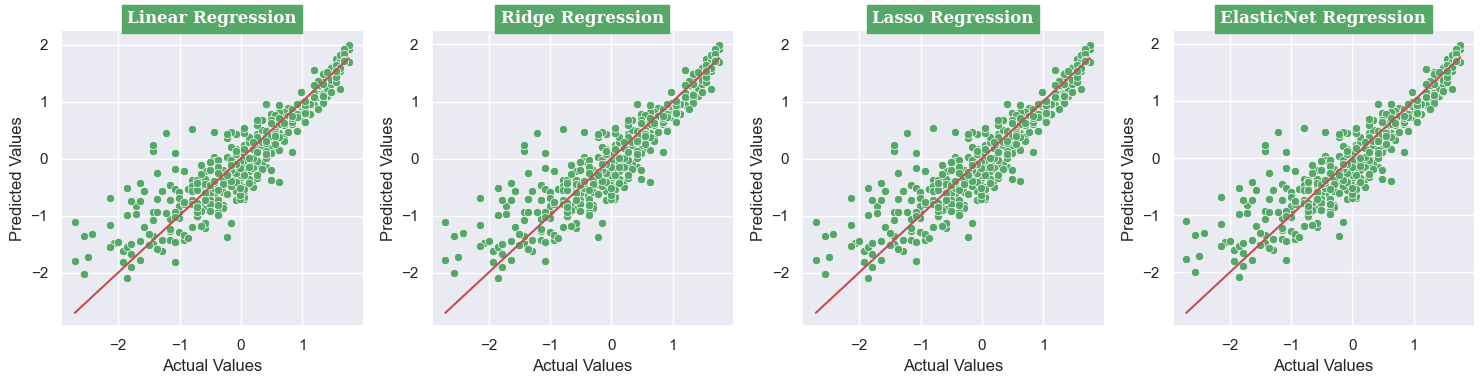

In [90]:
actual_values = y_train.values.reshape((-1,))
predicted_values = [y_pred_train.reshape((-1,)), y_pred_train_ridge.reshape((-1,)), 
                    y_pred_train_lasso.reshape((-1,)),y_pred_train_en.reshape((-1,))]
model = ['Linear Regression', 'Ridge Regression', 'Lasso Regression','ElasticNet Regression']
plt.figure(figsize=(15,4))
i=1
for preds in predicted_values:
    plt.subplot(1,4,i)
    sns.scatterplot(x=actual_values, y=preds,color='g')
    plt.plot([np.min(actual_values), np.max(actual_values)], [np.min(actual_values), np.max(actual_values)], 'r-')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(model[i-1],fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
    i+=1
plt.tight_layout()
sns.despine()
plt.show();

# Actionable Insights and Recommendations :

* First column was observed as unique row identifier which was dropped and was not required for model building.

* University Rating , SOP and LOR strength and research are seems to be discrete random Variables , but also ordinal numeric data.

* All the other features are numeric, ordinal and continuous.

* No null values were present in data.

* No Significant amount of outliers were found in data.

* Chance of admission(target variable) and GRE score(an independent feature) are nearly normally distrubted.

* Independent Variables (Input data): GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research

* Target/Dependent Variable : Chance of Admit (the value we want to predict)

* from correlation heatmap , we can observe GRE score, TOEFL score and CGPA have very high correlation with Change of admission.

* University rating, SOP ,LOR and Research have comparatively slightly less correlated than other features.

* chances of admit is a probability measure , which is within 0 to 1 which is good (no outliers or missleading data in column).

* Range of GRE score looks like between 290 to 340.

* Range of TOEFL score is between 92 to 120.

* university rating , SOP and LOR are distributed between range of 1 to 5.

* CGPA range is between 6.8 to 9.92.

* From boxplots (distribution of chance of admition (probability of getting admition) as per GRE score ) : with higher GRE score , there is high probability of getting an admition .

* Students having high toefl score , has higher probability of getting admition .

* from count plots, we can observe , statement of purpose SOP strength is positively correlated with Chance of Admission .

* we can also similar pattern in Letter of Recommendation Stength and University rating , have positive correlation with Chaces of Admission .

* Student having research has higher chances of Admission , but also we can observe some outliers within that caregory.

**Regression Analysis :**
- From the above bar chart and REPORT file, We can observe that CGPA is the most important feature for predicting the chances of admission.
- Apart from CGPA other important features are GRE and TOEFL score.
- When analysing the assumption for linear regression, check for Multicolinearity,
Observation: Getting all the VIF scores below 5 , shows there's no high multicolinearity.
- All the residuals are not perfectly normally distributed. and so residual plot we can observe some level of heteroscedasticity.
Our Model shows very similar metrics just like other model metrics.





 **Recommendations**
---


- The education institute can help the student to improve their GRE Score and CGPA. Still, in addition, they can also assist them in writing good LOR and SOP thus increasing the chances of getting a better University.

- Launch monthly survey and work on the feedback provided.

- Awareness of CGPA and Research Capabilities :

- To increase awareness regarding CGPA and Research capabilities for increasing the chance of admission Seminars can be organised.
- Any student can never change their current state of attributes so awareness and marketing campaigns need to be surveyed hence creating a first impression on students at the undergraduate level, which won't just increase the company's popularity but will also help students get prepared for plans in advance.
- An interactive dashboard can be created for applicants whenever they log in to your website, hence allowing healthy competition also to create a progress report for students.
- Daily blogs should be published so that applicants Stay informed about emerging trends.
- Additional features like several hours they put in studying, watching lectures, assignments solved percentage, and marks in mock tests can result in a better report for every student to judge themselves and improve on their own.